# Effects of Inhomogeneity on Cosmological Models by Tolman
##  Geoff Cope
##  Univeristy of Utah
##  January 2, 2022

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1076370/pdf/pnas01743-0027.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,phi,dt,dr,dtheta,dphi = symbols( 't r theta phi dt dr dtheta dphi' ) 

In [4]:
omega = Function('omega')(r,t)
omega

In [6]:
Lambda = Function('lambda')(r,t)
Lambda

In [7]:
variables = Matrix( [t,r,theta,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix( [dt,dr,dtheta,dphi] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [9]:
lineElement = expand( dt**2 - exp(Lambda) * dr**2 - exp(omega) * (dtheta**2 + sin(theta)**2 * dphi**2) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡1      0          0              0        ⎤
⎢                                          ⎥
⎢     λ(r, t)                              ⎥
⎢0  -ℯ             0              0        ⎥
⎢                                          ⎥
⎢                ω(r, t)                   ⎥
⎢0      0      -ℯ                 0        ⎥
⎢                                          ⎥
⎢                           ω(r, t)    2   ⎥
⎣0      0          0      -ℯ       ⋅sin (θ)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡1      0          0              0        ⎤
⎢                                          ⎥
⎢     λ(r, t)                              ⎥
⎢0  -ℯ             0              0        ⎥
⎢                                          ⎥
⎢                ω(r, t)                   ⎥
⎢0      0      -ℯ                 0        ⎥
⎢                                          ⎥
⎢                           ω(r, t)    2   ⎥
⎣0      0          0      -ℯ       ⋅sin (θ)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r theta phi")
t,r,theta,phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                               ⎡             ∂                                         
⎢                                                                               ⎢             ──(λ(r, t))                               
⎢⎡0           0                     0                         0              ⎤  ⎢             ∂t                                        
⎢⎢                                                                           ⎥  ⎢     0       ───────────                  0            
⎢⎢    λ(r, t) ∂                                                              ⎥  ⎢                  2                                    
⎢⎢   ℯ       ⋅──(λ(r, t))                                                    ⎥  ⎢                                                       
⎢⎢            ∂t                                                             ⎥  ⎢∂            ∂                                         
⎢⎢0  ────────────────────           0    

In [17]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡                      2                                                                                                                
⎢                2    ∂                          2                                                                                      
⎢   ⎛∂          ⎞    ───(λ(r, t))   ⎛∂          ⎞                                                      ∂           ∂             ∂      
⎢   ⎜──(λ(r, t))⎟      2            ⎜──(ω(r, t))⎟      2                                               ──(λ(r, t))⋅──(ω(r, t))   ──(ω(r,
⎢   ⎝∂t         ⎠    ∂t             ⎝∂t         ⎠     ∂                                                ∂t          ∂r            ∂r     
⎢ - ────────────── - ──────────── - ────────────── - ───(ω(r, t))                                      ─────────────────────── - ───────
⎢         4               2               2            2                                                          2                     
⎢                                        

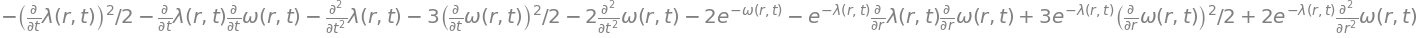

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                                                                       
⎢                                                2                                                                                      
⎢    ∂           ∂                  ⎛∂          ⎞         -ω(r, t)        -λ(r, t) ∂           ∂                   -λ(r, t) ⎛∂          
⎢0.5⋅──(λ(r, t))⋅──(ω(r, t)) + 0.25⋅⎜──(ω(r, t))⎟  + 1.0⋅ℯ         + 0.5⋅ℯ        ⋅──(λ(r, t))⋅──(ω(r, t)) - 0.75⋅ℯ        ⋅⎜──(ω(r, t))
⎢    ∂t          ∂t                 ⎝∂t         ⎠                                  ∂r          ∂r                           ⎝∂r         
⎢                                                                                                                                       
⎢                                                                                                                                       
⎢                                        

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
einsteinSimplifed = simplify(einst.tensor()) 
einsteinSimplifed

⎡                                                                                                                                       
⎢                                                2                                                                                      
⎢    ∂           ∂                  ⎛∂          ⎞         -ω(r, t)        -λ(r, t) ∂           ∂                   -λ(r, t) ⎛∂          
⎢0.5⋅──(λ(r, t))⋅──(ω(r, t)) + 0.25⋅⎜──(ω(r, t))⎟  + 1.0⋅ℯ         + 0.5⋅ℯ        ⋅──(λ(r, t))⋅──(ω(r, t)) - 0.75⋅ℯ        ⋅⎜──(ω(r, t))
⎢    ∂t          ∂t                 ⎝∂t         ⎠                                  ∂r          ∂r                           ⎝∂r         
⎢                                                                                                                                       
⎢                                                                                                                                       
⎢                                        

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                      2                                                                                                                
⎢                2    ∂                          2                                                                                      
⎢   ⎛∂          ⎞    ───(λ(r, t))   ⎛∂          ⎞                                                      ∂           ∂             ∂      
⎢   ⎜──(λ(r, t))⎟      2            ⎜──(ω(r, t))⎟      2                                               ──(λ(r, t))⋅──(ω(r, t))   ──(ω(r,
⎢   ⎝∂t         ⎠    ∂t             ⎝∂t         ⎠     ∂                                                ∂t          ∂r            ∂r     
⎢ - ────────────── - ──────────── - ────────────── - ───(ω(r, t))                                      ─────────────────────── - ───────
⎢         4               2               2            2                                                          2                     
⎢                                        

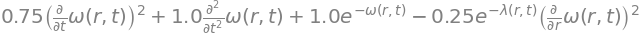

In [37]:
equation4 = expand((-exp(-Lambda))*einsteinSimplifed[1,1])
equation4

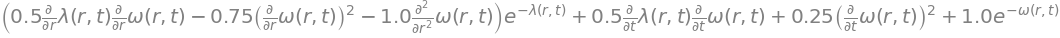

In [33]:
equation6 = collect( einsteinSimplifed[0,0] , exp(-Lambda) ) 
equation6

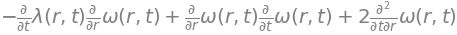

In [28]:
equation7 = expand((-2)*einsteinSimplifed[0,1])
equation7

In [39]:
#  Missing one field equation which comes from mixed index Ricci 
vacuumFieldEquations = Matrix([equation4,equation6,equation7])
vacuumFieldEquations

⎡                                               2         2                                                        2                    
⎢                                  ⎛∂          ⎞         ∂                  -ω(r, t)         -λ(r, t) ⎛∂          ⎞                     
⎢                             0.75⋅⎜──(ω(r, t))⎟  + 1.0⋅───(ω(r, t)) + 1.0⋅ℯ         - 0.25⋅ℯ        ⋅⎜──(ω(r, t))⎟                     
⎢                                  ⎝∂t         ⎠          2                                           ⎝∂r         ⎠                     
⎢                                                       ∂t                                                                              
⎢                                                                                                                                       
⎢⎛                                                2     2         ⎞                                                             2       
⎢⎜    ∂           ∂                  ⎛∂  